In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer['data'].shape

(569, 30)

In [6]:
X = cancer['data']
y = cancer['target']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(X, columns = cancer.feature_names)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

#### Why scale?

- to bring the features to the same range

- Is it needed always (in ML)
    - No
        - NB, DT, RF, Adaboost/GB/XGB (why?)
            - computing any parameter in terms of the geometrical space
    - Yes
        - KNN
        - Logistic Regression (?)
        - SVM (?)
        - NN (?)
            - Compute the gradient (based on the errors, y - y_hat)
                - y_hat is dependent on the col values
                    - Xs have different scales, that will affect the error
                        - computation of gradients - big/small numbers
                            - CONVERGENCE to the min will be an issue
                                - NN will take longer to train

In [12]:
X_train_std  = scaler.transform(X_train)
X_test_std   = scaler.transform(X_test)

## train the model

In [13]:
from sklearn.neural_network import MLPClassifier

- `hidden_layer_sizes` tuple, length = n_layers - 2, default=(100,)
    - The ith element represents the number of neurons in the ith hidden layer.
    - [64, 32, 16, 8]
        - 4 hidden layers
            - 1st layer with 64 neurons
            - 2nd layer with 32 neurons
            - 3rd layer with 16 nodes
            - 4th layer with  8 nodes
- `activation` 
    - {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
        - we will use 'logistic`
            - synonymous with `sigmoid`
- `solver` {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - choice of gradient descent
    - simple GD will be `sgd`
- `batch_size` int, default=’auto’
    - typical values 
        - 256, 200, 128, 64, 32
- `learning_rate`
    - {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
- `learning_rate_init` double, default=0.001
    - The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
- `max_iter` int, default=200
    - Maximum number of iterations. 
    - The `solver iterates until convergence` (determined by ‘tol’) or this `number of iterations`. 
    - For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- `shuffle` bool, default=True
    - Whether to shuffle samples in each iteration. 
    - Only used when solver=’sgd’ or ‘adam’.
- `tol` float, default=1e-4
    - threshold
    - Tolerance for the optimization. 
    - When the loss or score is not improving by at least `tol` for `n_iter_no_change` consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
- `verbose` bool, default=False
    - Whether to print progress messages to stdout.
- `early_stopping` - bool, default=False
    - Whether to use early stopping to terminate training when validation score is not improving. 
    - If set to true, it will automatically set aside 10% of training data as validation and terminate training when `validation score is not improving` by at least `tol` for `n_iter_no_change` consecutive epochs. 
    - The split is stratified, except in a multilabel setting. Only effective when solver=’sgd’ or ‘adam’
- `validation_fraction` float, default=0.1
    - The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. 
    - Only used if early_stopping is True
    - typical good values 
        - 20%, 25%, 30%
- `n_iter_no_change` int, default=10
    - Maximum number of epochs/iterations to not meet `tol` improvement. 
    - Only effective when solver=’sgd’ or ‘adam’
    - typical values 
        - 10, 15, 20
- `random_state` int, RandomState instance, default=None
    - Determines random number generation for `weights` and `bias` initialization, `train-test split` if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. 
    - Pass an `int` for reproducible results across multiple function calls.

SGD 
- starts with as many samples you have
    - compute the weights with however many samples you have right now in the training set
    - later , more samples arrive, you push them to the ML model
        - incrementally train the model
            - the weights will be  adjusted

##### Config 1

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(64),           # with 1 l
                    activation='logistic',             # same as sigmoid
                    solver='sgd',
                    batch_size=32,
                    learning_rate='constant',
                    learning_rate_init=.01,            # .01, .05, .005, .001
                    max_iter=1500,
                    shuffle=True,
                    tol=.0001,                         # .0001, .001, .01, .05
                    verbose=False,
                    early_stopping=False,               # Always use this, set to True
                    validation_fraction=.20,          # 20% is fine
                    n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
                    random_state=100
                   )

##### Config 2

In [47]:
# mlp = MLPClassifier(hidden_layer_sizes=(64),           # with 1 l
#                     activation='logistic',             # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 3
- play with more than 1 layer (32, 16, 8)
- with activation set to 'sigmoid' 
    - this will degrade the performance
        - sigmoid is not a good choice for hidden layer

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(64),    # with 2 l
                    activation='logistic',             # same as sigmoid
                    solver='sgd',
                    batch_size=32,
                    learning_rate='constant',
                    learning_rate_init=.01,           # .01, .05, .005, .001
                    max_iter=1500,
                    shuffle=True,
                    tol=.0001,                         # .0001, .001, .01, .05
                    verbose=False,
                    early_stopping=True,               # Always use this, set to True
                    validation_fraction=.20,           # 20% is fine
                    n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
                    random_state=100
                   )

##### Config 4
- play with more than 1 layer (32, 16, 8)
- with activation set to 'relu' 
    - this will improve the performance


In [65]:
# mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 8),    # with 2 l
#                     activation='relu',                 # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 5
- 1 layer (32) --- try with 32/16/8/4/3
- with activation set to 'relu' 
    - this will improve the performance


In [66]:
# mlp = MLPClassifier(hidden_layer_sizes=(4),           # with 1 l
#                     activation='relu',                # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=50,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

In [15]:
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=64,
              learning_rate_init=0.01, max_iter=1500, random_state=100,
              solver='sgd', validation_fraction=0.2)

#### Predictions and Evaluation
 
Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [16]:
y_pred = mlp.predict(X_test_std)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[47  3]
 [ 1 92]]


In [18]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.97      0.99      0.98        93

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972


In [19]:
#mlp.loss_curve_

In [20]:
import matplotlib.pyplot as plt

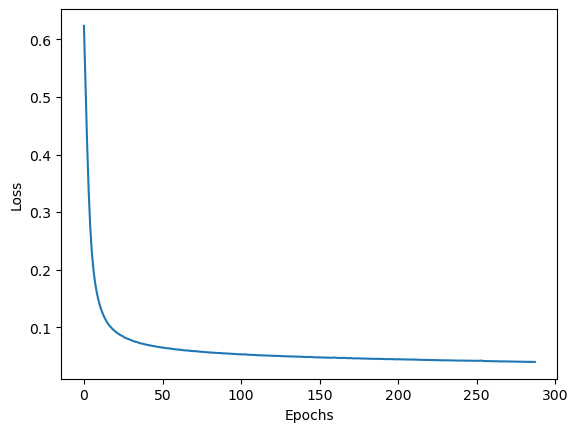

In [21]:
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

extract the MLP __weights__ and __biases__ after training your model, we use its public attributes __coefs___ and __intercepts___.

coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [605]:
#mlp.hidden_layer_sizes

In [606]:
#len(mlp.coefs_)

In [607]:
#len(mlp.coefs_[0])

In [608]:
# check the size of weights matrix (between the input and the hidden layer)
#mlp.coefs_[0].shape

In [609]:
# check the sizepf weights matrix (between the hidden layer and the output)
#mlp.coefs_[1].shape

In [610]:
#mlp.batch_size

In [611]:
#mlp.classes_

In [612]:
#len(mlp.intercepts_)

In [613]:
#mlp.intercepts_

In [614]:
# this should match the number of neurons in the hidden layer
#len(mlp.intercepts_[0])

In [615]:
# this should match the number of neurons in the output layer
#len(mlp.intercepts_[1])